### <b>Code Conversion Project(R to Python)<b>

#### Importing Libraries

In [43]:
import pandas as pd
import numpy as np

#### Load the McDonalds dataset

In [44]:
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


#### Get the information about the dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


#### Checking for null values

In [46]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

#### Column names in the dataset

In [48]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

#### Getting the shape 

In [5]:
df.shape

(1453, 15)

#### Summary Statistics

In [41]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,0.0
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,4.636614,44.604955,2.637990,0.457674,NaN
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.446175,14.221178,1.756057,0.498377,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,1.000000,0.000000,NaN
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,3.000000,0.000000,NaN
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000,4.000000,1.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000,5.000000,1.000000,NaN


#### Average value of each transformed segmentation variable

In [6]:
# Convert the first 11 columns to a binary matrix
MD_x = df.iloc[:, :11].map(lambda x: 1 if x == "Yes" else 0).values

# Calculate column means
col_means = MD_x.mean(axis=0).round(2)
col_means_df = pd.DataFrame(col_means, index=df.columns[:11], columns=['Mean'])

print("Column Means:")
print(col_means_df)


Column Means:
            Mean
yummy       0.55
convenient  0.91
spicy       0.09
fattening   0.87
greasy      0.53
fast        0.90
cheap       0.60
tasty       0.64
expensive   0.36
healthy     0.20
disgusting  0.24


#### Principal Component Analysis(PCA)

In [7]:
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Extract PCA results
explained_variance_ratio = pca.explained_variance_ratio_  # Proportion of Variance
cumulative_variance = np.cumsum(explained_variance_ratio)  # Cumulative Proportion
standard_deviation = np.sqrt(pca.explained_variance_)  # Standard deviation of components

# Create a summary DataFrame
pca_summary = pd.DataFrame({
    'Standard Deviation': standard_deviation,
    'Proportion of Variance': explained_variance_ratio.round(4),
    'Cumulative Proportion': cumulative_variance.round(4)
}, index=[f'PC{i+1}' for i in range(len(explained_variance_ratio))])

# Display the PCA summary
print("\nPCA Summary:")
print(pca_summary)


PCA Summary:
      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                  0.2994                 0.2994
PC2             0.607456                  0.1928                 0.4922
PC3             0.504619                  0.1330                 0.6253
PC4             0.398799                  0.0831                 0.7084
PC5             0.337405                  0.0595                 0.7679
PC6             0.310275                  0.0503                 0.8182
PC7             0.289697                  0.0438                 0.8620
PC8             0.275122                  0.0395                 0.9016
PC9             0.265251                  0.0368                 0.9383
PC10            0.248842                  0.0324                 0.9707
PC11            0.236903                  0.0293                 1.0000


In [8]:
# Standard deviations (square root of eigenvalues)
standard_deviations = np.sqrt(pca.explained_variance_)

print("Standard Deviations (1, .., p=11):")
print(standard_deviations.round(1))  # Rounded to 1 decimal


Standard Deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


#### Eigenvectors in Python or Rotation Matrix in R

In [9]:
# Rotation matrix (principal components)
rotation_matrix = pd.DataFrame(
    pca.components_.T,  # Transpose 
    index=df.columns[:11],  # Features as row labels
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]  # Principal component names
)

print("\nRotation Matrix (n x k):")
print(rotation_matrix.round(3))  # Rounded to 3 decimals


Rotation Matrix (n x k):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110  0.0

#### Projection of data in PCA components

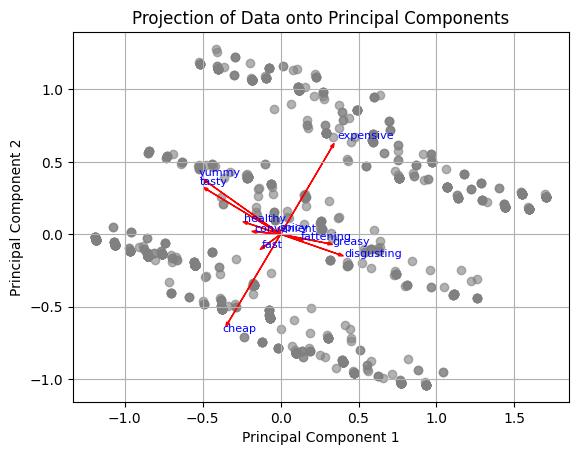

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get the column names from the original DataFrame
column_names = df.columns[:11]  # using the first 11 columns

# Fit PCA
pca = PCA(n_components=11)  # Adjust components as needed
MD_pca = pca.fit_transform(MD_x)

# Plot the projected data
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.6)
plt.title("Projection of Data onto Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Draw PCA axes
components = pca.components_  # Eigenvectors (directions of PCA axes)
for i in range(components.shape[1]):
    # Adding arrows for PCA axes
    plt.arrow(0, 0, components[0, i], components[1, i], 
              color='red', head_width=0.02, head_length=0.03)
    
    # Adding column names as labels for PCA axes
    plt.text(components[0, i] * 1.1, components[1, i] * 1.1, 
             column_names[i], color='blue', fontsize=8)

plt.grid()
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

#### Performing K-Means Clustering

In [12]:
import numpy as np
import random
from sklearn.cluster import KMeans

# Set seed
np.random.seed(1234)
random.seed(1234)

# Simulate some data
MD_x = df.values

# Perform K-means clustering for clusters 2 to 8
best_inertia = np.inf
best_kmeans = None
for k in range(2, 9):
    inertia = 0
    for _ in range(10):
        kmeans = KMeans(n_clusters=k, random_state=None).fit(MD_x)
        inertia += kmeans.inertia_
    avg_inertia = inertia / 10
    if avg_inertia < best_inertia:
        best_inertia = avg_inertia
        best_kmeans = kmeans

# Relabel clusters 
MD_km28_labels = best_kmeans.labels_

print("Best K:", best_kmeans.n_clusters)
print("Cluster labels:", MD_km28_labels)

Best K: 8
Cluster labels: [3 5 7 ... 5 6 1]


#### Use Matplotlib to visualize the inertia for different numbers of segments.

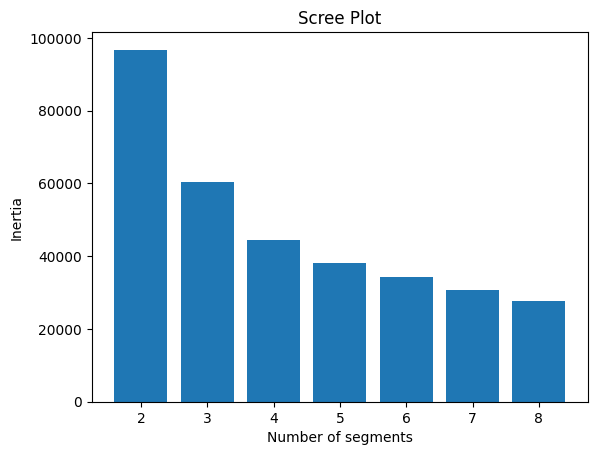

In [13]:
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set seed
np.random.seed(1234)
random.seed(1234)

# Simulate some data 
MD_x = df.values

# Perform K-means clustering for clusters 2 to 8
inertia_values = []
for k in range(2, 9):
    inertia = 0
    for _ in range(10):
        kmeans = KMeans(n_clusters=k, random_state=None).fit(MD_x)
        inertia += kmeans.inertia_
    avg_inertia = inertia / 10
    inertia_values.append(avg_inertia)

# Plotting the bar chart
plt.bar(range(2, 9), inertia_values)
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.show()


#### Performed bootstrap analysis and create a stability boxplot

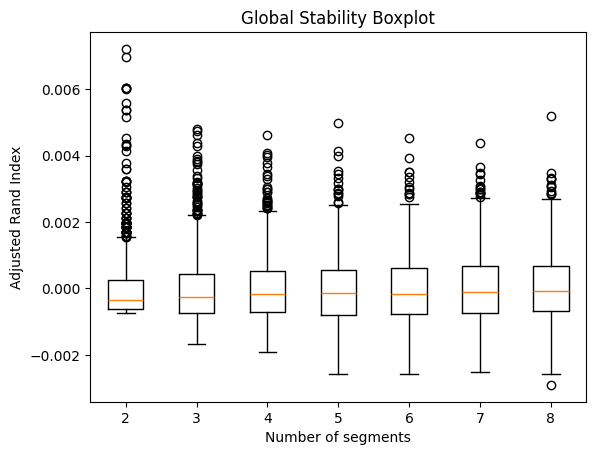

In [14]:
import random
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.stats import bootstrap
import matplotlib.pyplot as plt

# Set seed
np.random.seed(1234)
random.seed(1234)

# Simulate some data 
MD_x = df.values

# Perform bootstrapping
def perform_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=None).fit(data)
    return kmeans.labels_

# Number of clusters range
cluster_range = range(2, 9)
n_rep = 10
n_boot = 100
adjusted_rand_indices = {k: [] for k in cluster_range}

# Perform clustering and bootstrapping
for k in cluster_range:
    for _ in range(n_boot):
        bootstrap_samples = random.choices(MD_x, k=MD_x.shape[0])
        cluster_labels = perform_clustering(bootstrap_samples, k)
        for _ in range(n_rep):
            sample_indices = np.random.choice(MD_x.shape[0], MD_x.shape[0], replace=True)
            sample_labels = perform_clustering(MD_x[sample_indices], k)
            ari = adjusted_rand_score(cluster_labels, sample_labels)
            adjusted_rand_indices[k].append(ari)

# Create a boxplot
plt.boxplot([adjusted_rand_indices[k] for k in cluster_range], positions=list(cluster_range))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.show()


#### Extracting Cluster Labels

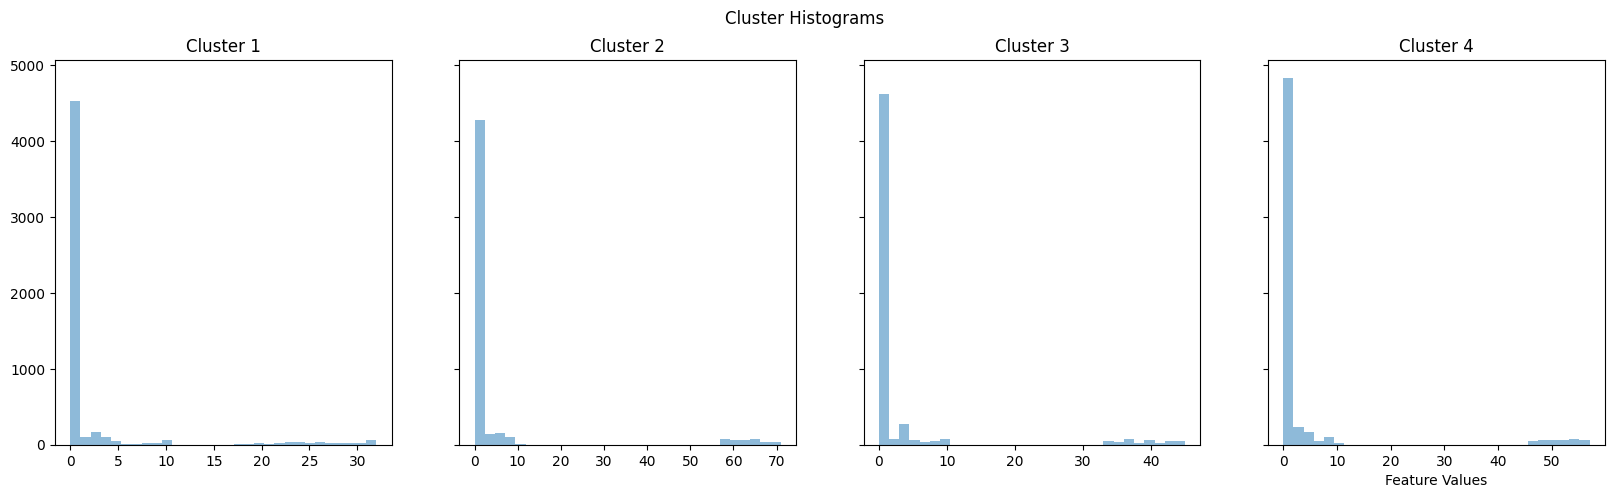

In [15]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

MD_x = df.values

# Fit the KMeans model with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
labels_4 = kmeans_4.labels_

# Create histograms for each cluster
def plot_cluster_histograms(data, labels, num_clusters):
    fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5), sharey=True)
    for cluster in range(num_clusters):
        cluster_data = data[labels == cluster]
        axes[cluster].hist(cluster_data.flatten(), bins=30, alpha=0.5)
        axes[cluster].set_title(f'Cluster {cluster+1}')
    plt.xlabel('Feature Values')
    plt.suptitle('Cluster Histograms')
    plt.show()

# Call the function with your data and labels
plot_cluster_histograms(MD_x, labels_4, 4)


#### Created a segment-level stability across solutions (SLSA) plot

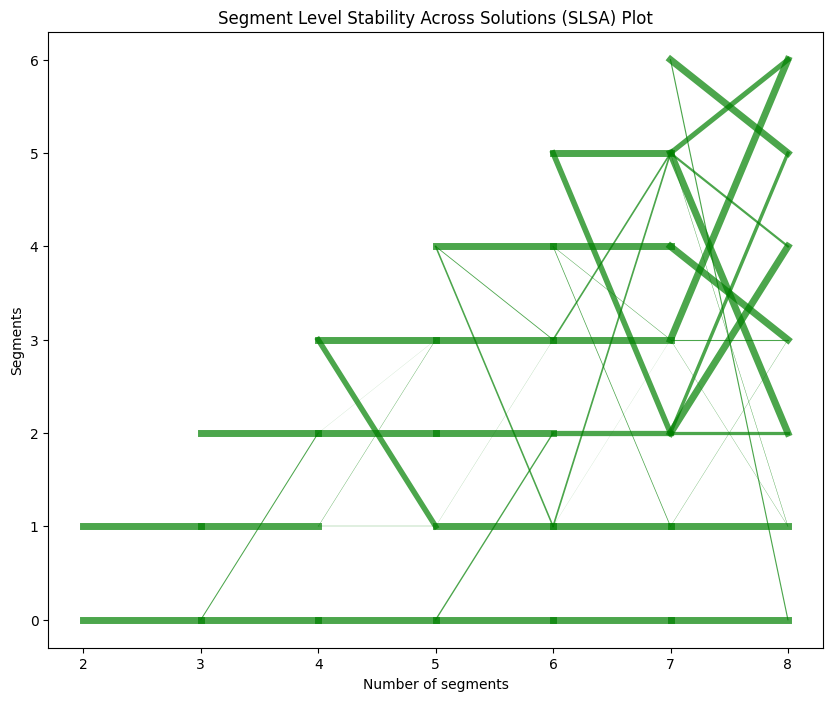

In [16]:
# Fit KMeans for different numbers of clusters and track segment memberships
cluster_range = range(2, 9)
segment_memberships = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=1234).fit(MD_x)
    segment_memberships.append(kmeans.labels_)

# Plot SLSA plot
def plot_slsa(segment_memberships):
    fig, ax = plt.subplots(figsize=(10, 8))
    for k in range(len(segment_memberships)-1):
        for segment in np.unique(segment_memberships[k]):
            current_segment = segment_memberships[k] == segment
            next_segment = segment_memberships[k+1][current_segment]
            counts = np.bincount(next_segment, minlength=k+2)
            for next_seg in range(k+2):
                if counts[next_seg] > 0:
                    ax.plot([k, k+1], [segment, next_seg], 
                            'g-', lw=counts[next_seg]/max(counts)*5, alpha=0.7)
    ax.set_xticks(range(len(cluster_range)))
    ax.set_xticklabels([f'{k}' for k in cluster_range])
    ax.set_xlabel('Number of segments')
    ax.set_ylabel('Segments')
    ax.set_title('Segment Level Stability Across Solutions (SLSA) Plot')
    plt.show()

# Call the function with segment memberships
plot_slsa(segment_memberships)


In [17]:
# Fit the KMeans model with 4 clusters 
kmeans_4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
MD_k4_labels = kmeans_4.labels_


#### Segment Stability 

In [18]:
from sklearn.metrics import adjusted_rand_score

def calculate_segment_stability(data, labels, n_clusters):
    stability_scores = []
    for cluster in range(n_clusters):
        cluster_data_indices = labels == cluster
        cluster_data = data[cluster_data_indices]
        
        # Resample the cluster data and re-cluster
        if len(cluster_data) > 1:
            kmeans_resample = KMeans(n_clusters=1, random_state=1234).fit(cluster_data)
            resample_labels = kmeans_resample.labels_
            ari = adjusted_rand_score(labels[cluster_data_indices], resample_labels)
            stability_scores.append(ari)
        else:
            stability_scores.append(0)
            
    return stability_scores

# Calculate segment stability for 4 clusters
segment_stability = calculate_segment_stability(MD_x, MD_k4_labels, 4)


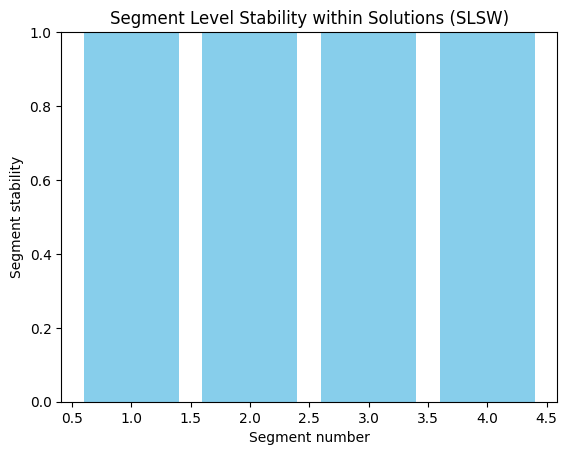

In [19]:
import matplotlib.pyplot as plt

# Plot segment stability
def plot_segment_stability(stability_scores):
    plt.bar(range(1, len(stability_scores) + 1), stability_scores, color='skyblue')
    plt.ylim(0, 1)
    plt.xlabel('Segment number')
    plt.ylabel('Segment stability')
    plt.title('Segment Level Stability within Solutions (SLSW)')
    plt.show()

# Call the function with calculated stability scores
plot_segment_stability(segment_stability)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from scipy.special import expit

def fit_finite_mixture(data, n_components, n_restarts=10):
    best_model = None
    best_log_likelihood = -np.inf
    
    for _ in range(n_restarts):
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=100, random_state=np.random.randint(1000))
        gmm.fit(data)
        
        # Calculate log likelihood
        log_likelihood = gmm.score(data)
        
        if log_likelihood > best_log_likelihood:
            best_log_likelihood = log_likelihood
            best_model = gmm
    
    return best_model

# Fit models for 2 to 8 segments
models = []
for k in range(2, 9):
    model = fit_finite_mixture(MD_x, n_components=k, n_restarts=10)
    models.append(model)


In [21]:
# Select the best model based on log likelihood
best_model = max(models, key=lambda model: model.score(MD_x))

# Print the best model information
print("Best model has", best_model.n_components, "segments")


Best model has 8 segments


#### Gaussian Mixture Models to simulate the latent class analysis

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

MD_x = df.values

# Fit Gaussian Mixture Models for different numbers of segments
models = []
aic_values = []
bic_values = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, covariance_type='full', max_iter=100, random_state=1234, n_init=10).fit(MD_x)
    models.append(gmm)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

# Calculate ICL 
icl_values = bic_values


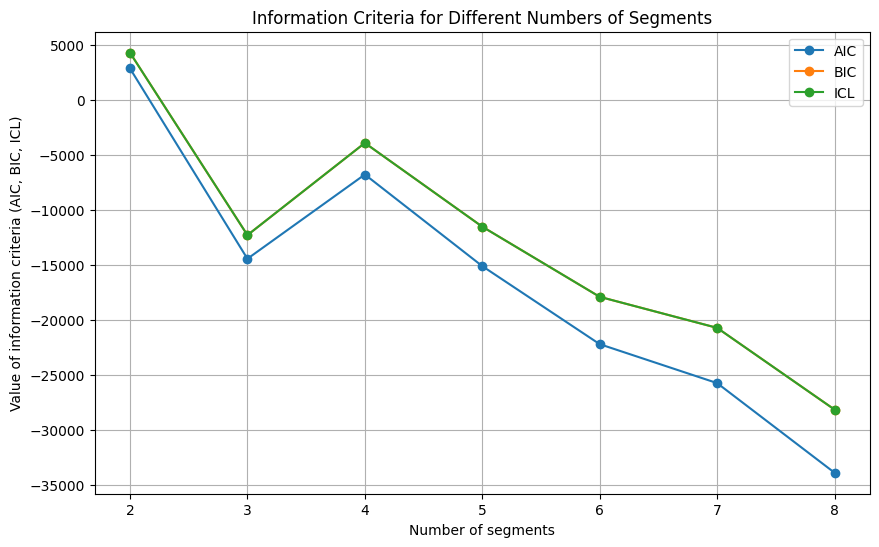

In [23]:
# Plot the information criteria
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), aic_values, marker='o', label='AIC')
plt.plot(range(2, 9), bic_values, marker='o', label='BIC')
plt.plot(range(2, 9), icl_values, marker='o', label='ICL')
plt.xlabel('Number of segments')
plt.ylabel('Value of information criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Different Numbers of Segments')
plt.legend()
plt.grid(True)
plt.show()


#### Cross-Tabulation of K-Means and Mixture Model Clusters

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

MD_x = df.values

# Fit KMeans model with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
kmeans_labels = kmeans_4.labels_

# Fit Gaussian Mixture Models for different numbers of segments
models = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, covariance_type='full', max_iter=100, random_state=1234, n_init=10).fit(MD_x)
    models.append(gmm)

# Get the four-component model
MD_m4 = models[2]  # Since k=4 corresponds to index 2 in our models list (2 to 8 clusters)

# Mixture model cluster labels
mixture_labels = MD_m4.predict(MD_x)

# Create a cross-tabulation (confusion matrix)
cross_tab = confusion_matrix(kmeans_labels, mixture_labels)
print("Cross-Tabulation of K-Means and Mixture Model Clusters:")
print(cross_tab)

# Fit the mixture model with K-Means segment memberships
MD_m4a = GaussianMixture(n_components=4, covariance_type='full', max_iter=100, random_state=1234, n_init=10)
MD_m4a.fit(MD_x, y=kmeans_labels)

# Mixture model cluster labels (initialized with K-Means)
mixture_labels_a = MD_m4a.predict(MD_x)

# Create a cross-tabulation (confusion matrix)
cross_tab_a = confusion_matrix(kmeans_labels, mixture_labels_a)
print("Cross-Tabulation of K-Means and Mixture Model Clusters (Initialized with K-Means):")
print(cross_tab_a)


Cross-Tabulation of K-Means and Mixture Model Clusters:
[[ 32 303   2  25]
 [ 58 220  22  35]
 [ 68 263   7  33]
 [ 61 275  14  35]]
Cross-Tabulation of K-Means and Mixture Model Clusters (Initialized with K-Means):
[[ 32 303   2  25]
 [ 58 220  22  35]
 [ 68 263   7  33]
 [ 61 275  14  35]]


#### Using Mixtures of Regression Models

In [25]:
df1 = pd.read_csv('mcdonalds.csv')
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [27]:
# Check for missing values
print("Missing values before encoding:")
print(df1.isnull().sum())

Missing values before encoding:
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [28]:
from sklearn.preprocessing import LabelEncoder

# Mapping the ordinal values to numeric values
like_mapping = {
    'I love it!+5': 1,
    '+4': 2,
    '+3': 3,
    '+2': 4,
    '+1': 5,
    '0': 6,
    '-1': 7,
    '-2': 8,
    '-3': 9,
    '-4': 10,
    'I hate it!-5': 11
}

df['Like.n'] = df['Like'].map(like_mapping)
df['Like.n'] = 6 - df['Like.n']

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("Transformed Data Summary:")
print(df.info())



Transformed Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yummy           1453 non-null   int32  
 1   convenient      1453 non-null   int32  
 2   spicy           1453 non-null   int32  
 3   fattening       1453 non-null   int32  
 4   greasy          1453 non-null   int32  
 5   fast            1453 non-null   int32  
 6   cheap           1453 non-null   int32  
 7   tasty           1453 non-null   int32  
 8   expensive       1453 non-null   int32  
 9   healthy         1453 non-null   int32  
 10  disgusting      1453 non-null   int32  
 11  Like            1453 non-null   int32  
 12  Age             1453 non-null   int64  
 13  VisitFrequency  1453 non-null   int32  
 14  Gender          1453 non-null   int32  
 15  Like.n          0 non-null      float64
dtypes: float64(1), int32(14), int64(1)
memory usage: 102

In [29]:
import pandas as pd

independent_vars = df1.columns[:11]
formula = "Like.n ~ " + " + ".join(independent_vars)
print("Formula:", formula)


Formula: Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture

# Mapping the ordinal values to numeric values
like_mapping = {
    'I love it!+5': 1,
    '+4': 2,
    '+3': 3,
    '+2': 4,
    '+1': 5,
    '0': 6,
    '-1': 7,
    '-2': 8,
    '-3': 9,
    '-4': 10,
    'I hate it!-5': 11
}

df1['Like.n'] = df1['Like'].map(like_mapping)
df1['Like.n'] = 6 - df1['Like.n']

# Handle missing values by dropping rows with NaN values in 'Like.n'
df1 = df1.dropna(subset=['Like.n'])


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    label_encoders[column] = le

# Display the transformed DataFrame
print(df1)

# Check the encoding for each column
for column, le in label_encoders.items():
    print(f"Encoding for '{column}': {dict(zip(le.classes_, le.transform(le.classes_)))}")


      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  \
0             1        0           0     6   61 

#### Fit finite mixture of regression models

In [32]:
# Define the independent variables
independent_vars = df1.columns[:11]

# Define the function to fit finite mixture of linear regression models
def fit_mixture_of_linear_models(data, n_components, n_restarts=10, verbose=False):
    best_model = None
    best_log_likelihood = -np.inf
    X = data[independent_vars].values
    y = data['Like.n'].values
    
    for _ in range(n_restarts):
        try:
            gmm = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=100, random_state=np.random.randint(1000))
            gmm.fit(X)
            labels = gmm.predict(X)

            regression_models = []
            for k in range(n_components):
                reg = LinearRegression()
                reg.fit(X[labels == k], y[labels == k])
                regression_models.append(reg)

            # Calculate log likelihood
            log_likelihood = gmm.score(X)

            if log_likelihood > best_log_likelihood:
                best_log_likelihood = log_likelihood
                best_model = (gmm, regression_models)
        except ValueError as e:
            if verbose:
                print(f"Failed to fit model on iteration with error: {e}")
    
    return best_model

# Fit the model with 2 components and 10 random starts
best_model = fit_mixture_of_linear_models(df1, n_components=2, n_restarts=10, verbose=True)

if best_model is not None:
    # Display the result
    gmm, regression_models = best_model
    print("Cluster sizes:", np.bincount(gmm.predict(df1[independent_vars].values)))
else:
    print("No valid model found.")


Cluster sizes: [468 985]


### Calculate the p-values for the coefficients of each regression model.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Function to calculate p-values for each coefficient
def calculate_p_values(X, y, model):
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)
    
    # Calculate residuals
    newX = np.append(np.ones((len(X), 1)), X, axis=1)
    MSE = (sum((y - predictions)**2)) / (len(newX) - len(newX[0]))
    
    # Calculate variance-covariance matrix
    var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
    sd_b = np.sqrt(var_b)
    
    # Calculate t-values and p-values
    ts_b = params / sd_b
    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - len(newX[0])))) for i in ts_b]
    
    return p_values

if best_model is not None:
    # Calculate p-values for each regression model
    p_values_list = []
    for i, model in enumerate(regression_models):
        p_values = calculate_p_values(df1[independent_vars].values, df1['Like.n'].values, model)
        p_values_list.append(p_values)

    # Combine p-values into a DataFrame
    p_values_df = pd.DataFrame(p_values_list, columns=['Intercept'] + list(independent_vars))
    p_values_df.index = [f'Component {i+1}' for i in range(len(regression_models))]

    # Melt the DataFrame for plotting
    p_values_melted = p_values_df.melt(var_name='Parameter', value_name='p-value', ignore_index=False)
    p_values_melted.reset_index(inplace=True)

    

#### Created the plot to show the significance of the model parameters.

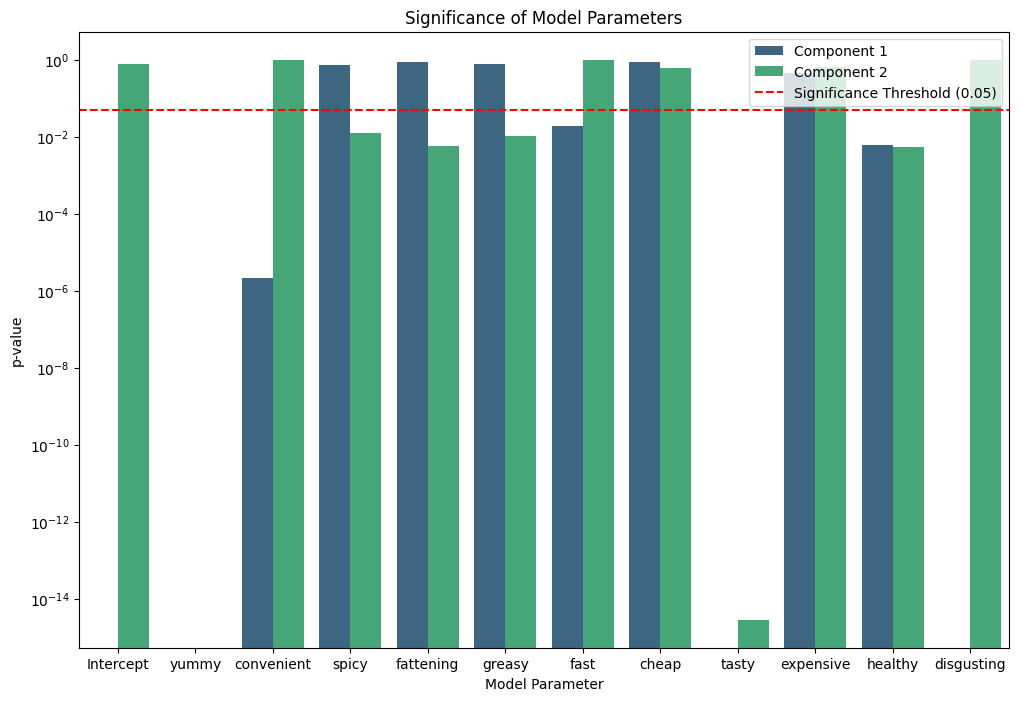

In [34]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=p_values_melted, x='Parameter', y='p-value', hue='index', palette='viridis')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.yscale('log')
plt.xlabel('Model Parameter')
plt.ylabel('p-value')
plt.title('Significance of Model Parameters')
plt.legend()
plt.show()


In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Fit the KMeans model with 4 clusters (assuming you have this)
kmeans_4 = KMeans(n_clusters=4, random_state=1234).fit(df1)
k4 = kmeans_4.labels_

# Adding the segment membership to the DataFrame
df1['Segment'] = k4


#### Create Mosaic Plot for Like Variable

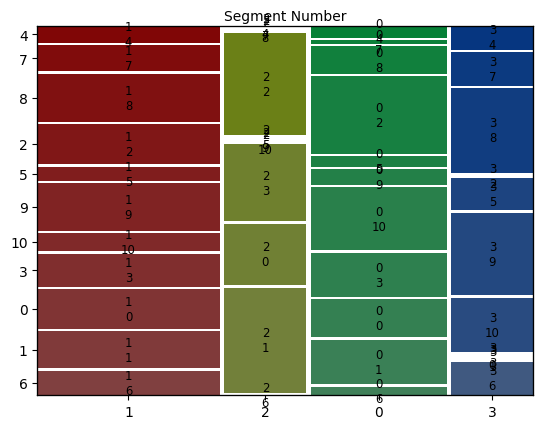

In [36]:
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Convert 'Like' back to categorical for the purpose of plotting
# like_mapping_reverse = {1: 'I love it!+5', 2: '+4', 3: '+3', 4: '+2', 5: '+1', 6: '0', 7: '-1', 8: '-2', 9: '-3', 10: '-4', 11: 'I hate it!-5'}
# df['Like'] = df['Like.n'].map(lambda x: like_mapping_reverse[6 - x])

# Create mosaic plot for 'Segment' and 'Like'
mosaic(df1, ['Segment', 'Like'], title='', gap=0.01)
plt.xlabel('Segment Number')
plt.show()


#### Create Mosaic Plot for Gender Variable

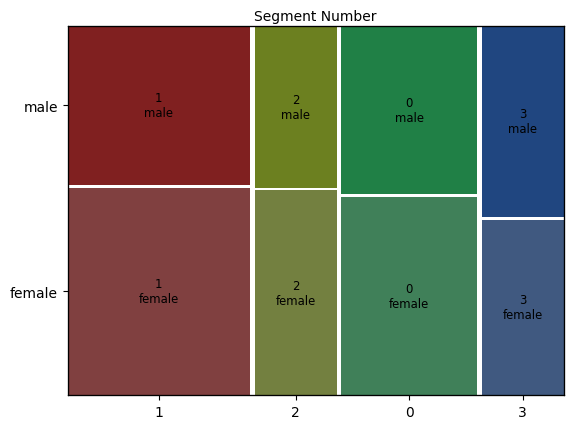

In [37]:
# Convert 'Gender' back to categorical for the purpose of plotting
gender_mapping_reverse = {0: 'female', 1: 'male'}
df1['Gender'] = df1['Gender'].map(lambda x: gender_mapping_reverse[x])

# Create mosaic plot for 'Segment' and 'Gender'
mosaic(df1, ['Segment', 'Gender'], title='', gap=0.01)
plt.xlabel('Segment Number')
plt.show()


#### Parallel box-and-whisker plot of age by segment

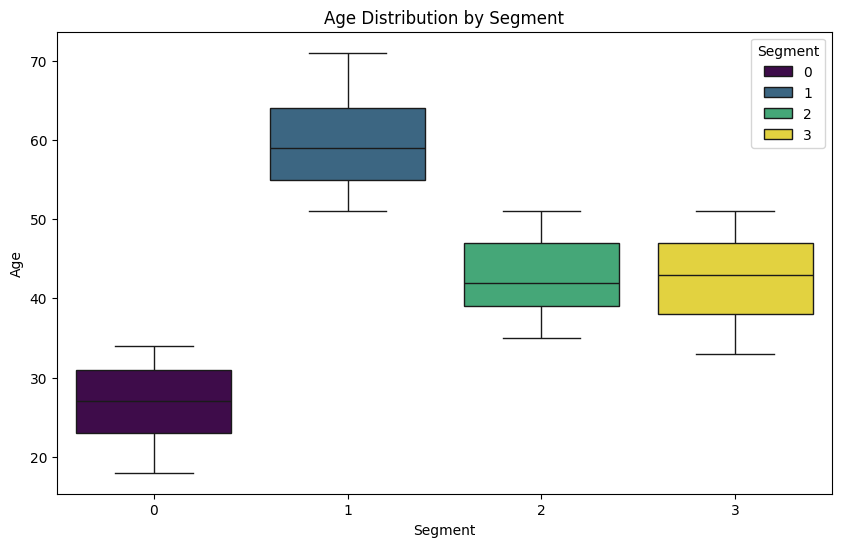

In [38]:

# Creating the parallel box-and-whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Age', hue= 'Segment', data=df1, palette='viridis', dodge=False)
plt.title('Age Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()


In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Gender' column 
label_encoders = {} 
le = LabelEncoder() 
df1['Gender'] = le.fit_transform(df1['Gender']) 
label_encoders['Gender'] = le 


#### Predict segment membership using descriptor variables

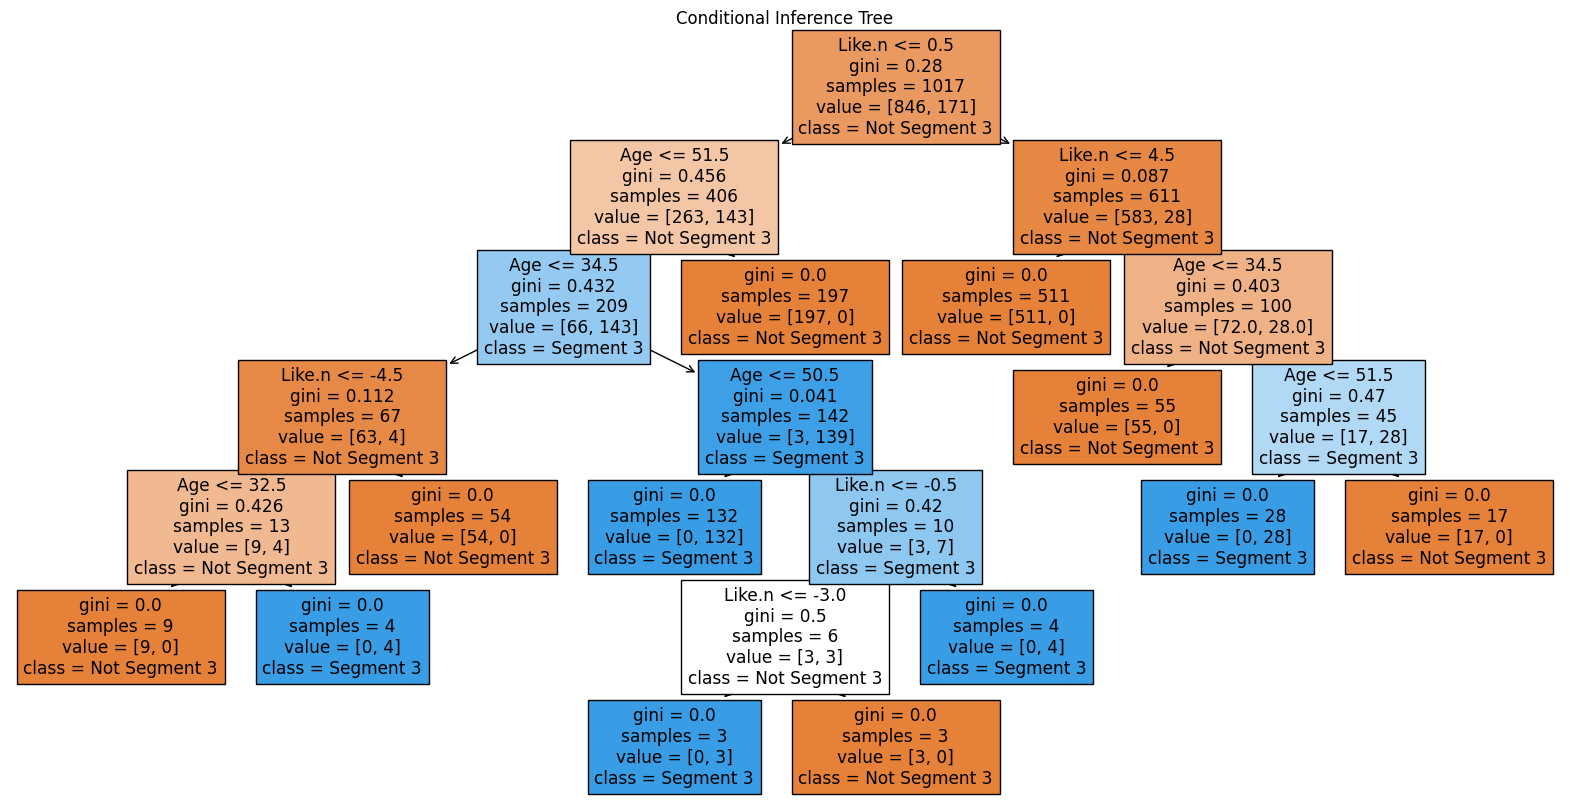

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter data to focus on segment 3 membership
df1['Segment3'] = (df1['Segment'] == 3).astype(int)

# Encode 'VisitFrequency'
visit_freq_mapping = {'daily': 0, 'weekly': 1, 'monthly': 2}
df1['VisitFrequency'] = df1['VisitFrequency'].map(visit_freq_mapping)

# Define feature matrix and target vector
X = df1[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = df1['Segment3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Train a DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.title('Conditional Inference Tree')
plt.show()
